# Enexis Case Data Exploration

This notebook explores the Enexis case data.

---
## Dependency Installation and Imports

This cell installs the dependencies and packages used by Python.

In [1]:
!pip install pandas chardet matplotlib

Here we import the dependencies, printing version numbers of key components, in case we need that for troubleshooting.

In [2]:
import os
import sys
print("python=={}".format(sys.version.replace('\n', '')))

import re
from datetime import datetime

import pandas as pd
print(f"pandas=={pd.__version__}")
ROW    = 0
COLUMN = 1
STRING = 'string'
OBJECT = 'object'
NUMBER = 'number'
CATEGORY = 'category'
INTEGER = 'integer'
UNSIGNED = 'unsigned'
FLOAT = 'float'

import numpy as np
print(f"numpy=={np.__version__}")

import matplotlib.pyplot as plt
from matplotlib import __version__ as matplotlib__version__
print(f"matplotlib=={matplotlib__version__}")

import chardet
print(f"chardet=={chardet.__version__}")


python==3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:11:30) [GCC 11.3.0]
pandas==1.5.3
numpy==1.24.2
matplotlib==3.7.1
chardet==5.1.0


---
## Dealing with File Encodings

The files have a bit of a mix of encodings. To make matters worse, the `chardet` library takes several minutes to analyse all files. To work around this, we create a list of encodings and cache that in `data/file_encodings.json` for reference.

---
## Lists...


In [3]:
CATEGORICAL_COLUMNS = [
    'NETBEHEERDER',
    'NETGEBIED',
    'STRAATNAAM',
    'POSTCODE_VAN',
    'POSTCODE_TOT',
    'WOONPLAATS',
    'LANDCODE',
    'PRODUCTSOORT',
    'VERBRUIKSSEGMENT',
    'SOORT_AANSLUITING']

DECENTRALE_OPWEK = [f"../data/{each}" for each in os.listdir("../data") if 'decentrale_opwek' in each]
KLEINVERBRUIKSGEGEVENS = [f"../data/{each}" for each in os.listdir("../data") if 'kleinverbruiksgegevens' in each]
OPWEKDATA_GV = [f"../data/{each}" for each in os.listdir("../data") if 'opwekdata_gv' in each]


---
## Load Small Users


In [4]:
# XXX df = pd.read_csv("../data/Enexis_kleinverbruiksgegevens_01012010.csv", sep = ';', encoding= 'ISO-8859-1')

li = []
for file in KLEINVERBRUIKSGEGEVENS:
    df = pd.read_csv(file, index_col=None, sep = ';', decimal=',', thousands='.', encoding= 'ISO-8859-1')

    df[CATEGORICAL_COLUMNS] = df[CATEGORICAL_COLUMNS].astype(CATEGORY)

    # convert integers to smallest unsigned integer and floats to smallest
    for old, new in [(INTEGER, UNSIGNED), (FLOAT, FLOAT)]:
        for col in df.select_dtypes(include=old).columns:
            df[col] = pd.to_numeric(df[col], downcast=new)

    match = re.search(r'_\d{2}\d{2}\d{4}\.csv', file)
    date = datetime.strptime(match.group(), '_%d%m%Y.csv').date()
    df['PEILDATUM'] = date

    df.rename({'SJA_LAAG_TARIEF_PERC': 'SJV_LAAG_TARIEF_PERC', 'SJA_GEMIDDELD': 'SJV_GEMIDDELD'}, axis=1, inplace=True)
    
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

df[CATEGORICAL_COLUMNS] = df[CATEGORICAL_COLUMNS].astype(CATEGORY)

# XXX tot 2021 ISO-8859; 21/22/23 -> UTF-8

# some columns names have spaces around them and those may be different per file
df.columns = df.columns.str.strip()

df

,NETBEHEERDER,NETGEBIED,STRAATNAAM,POSTCODE_VAN,POSTCODE_TOT,WOONPLAATS,LANDCODE,PRODUCTSOORT,VERBRUIKSSEGMENT,LEVERINGSRICHTING_PERC,AANSLUITINGEN_AANTAL,FYSIEKE_STATUS_PERC,SOORT_AANSLUITING_PERC,SOORT_AANSLUITING,SJV_GEMIDDELD,SJV_LAAG_TARIEF_PERC,SLIMME_METER_PERC,PEILDATUM
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,NL,ELK,KVB,100.000000,16,100,NaN,NaN,4282.00,25.000000,0.000000,2010-01-01
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,NL,ELK,KVB,100.000000,11,100,NaN,NaN,5113.00,10.000000,0.000000,2010-01-01
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,NL,ELK,KVB,100.000000,30,100,NaN,NaN,4809.00,34.000000,0.000000,2010-01-01
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,NL,ELK,KVB,100.000000,21,100,NaN,NaN,5015.00,44.000000,0.000000,2010-01-01
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,NL,ELK,KVB,100.000000,12,100,NaN,NaN,3074.00,22.000000,0.000000,2010-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035151,Enexis B.V.,ENEXIS,Knolweg,9998XE,9999XG,ROTTUM GN,NL,GAS,KVB,100.000000,12,100,75.000000,G4,3603.58,0.000000,NaN,2023-01-01
3035152,Enexis B.V.,ENEXIS,Stitswerderweg,9999XH,9999XJ,STITSWERD,NL,ELK,KVB,40.000000,15,100,60.000000,3x25,6944.07,31.850000,73.330002,2023-01-01
3035153,Enexis B.V.,ENEXIS,Stitswerderweg,9999XH,9999XJ,STITSWERD,NL,GAS,KVB,100.000000,14,100,92.860001,G4,2510.29,0.000000,NaN,2023-01-01
3035154,Enexis B.V.,ENEXIS,Stiel,9999XK,9999XL,STITSWERD,NL,ELK,KVB,42.860001,21,100,61.900002,3x25,2507.62,40.490002,76.190002,2023-01-01


In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3035156 entries, 0 to 3035155
Data columns (total 18 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   NETBEHEERDER            category
 1   NETGEBIED               category
 2   STRAATNAAM              category
 3   POSTCODE_VAN            category
 4   POSTCODE_TOT            category
 5   WOONPLAATS              category
 6   LANDCODE                category
 7   PRODUCTSOORT            category
 8   VERBRUIKSSEGMENT        category
 9   LEVERINGSRICHTING_PERC  float32 
 10  AANSLUITINGEN_AANTAL    uint16  
 11  FYSIEKE_STATUS_PERC     uint8   
 12  SOORT_AANSLUITING_PERC  float32 
 13  SOORT_AANSLUITING       category
 14  SJV_GEMIDDELD           float64 
 15  SJV_LAAG_TARIEF_PERC    float32 
 16  SLIMME_METER_PERC       float32 
 17  PEILDATUM               object  
dtypes: category(10), float32(4), float64(1), object(1), uint16(1), uint8(1)
memory usage: 182.0+ MB


In [6]:
df.describe(include=CATEGORY)

,NETBEHEERDER,NETGEBIED,STRAATNAAM,POSTCODE_VAN,POSTCODE_TOT,WOONPLAATS,LANDCODE,PRODUCTSOORT,VERBRUIKSSEGMENT,SOORT_AANSLUITING
count,3035156,3035156,3035156,3035156,3035156,3035156,3035156,3035156,3035156,2844609
unique,2,1,57444,273455,269041,1376,1,2,1,25
top,Enexis B.V.,ENEXIS,Kerkstraat,6163 XL,6164GC,GRONINGEN,NL,ELK,KVB,G4
freq,2714432,3035156,10838,14,14,124603,3035156,1642991,3035156,1269601


In [7]:
df['simme_meter_aantal'] = df['AANSLUITINGEN_AANTAL'] * df['SLIMME_METER_PERC'] / 100.0

df

,NETBEHEERDER,NETGEBIED,STRAATNAAM,POSTCODE_VAN,POSTCODE_TOT,WOONPLAATS,LANDCODE,PRODUCTSOORT,VERBRUIKSSEGMENT,LEVERINGSRICHTING_PERC,AANSLUITINGEN_AANTAL,FYSIEKE_STATUS_PERC,SOORT_AANSLUITING_PERC,SOORT_AANSLUITING,SJV_GEMIDDELD,SJV_LAAG_TARIEF_PERC,SLIMME_METER_PERC,PEILDATUM,simme_meter_aantal
0,Enexis B.V.,ENEXIS,Sasdijk,4251AB,4251AB,WERKENDAM,NL,ELK,KVB,100.000000,16,100,NaN,NaN,4282.00,25.000000,0.000000,2010-01-01,0.0000
1,Enexis B.V.,ENEXIS,Sasdijk,4251AC,4251AC,WERKENDAM,NL,ELK,KVB,100.000000,11,100,NaN,NaN,5113.00,10.000000,0.000000,2010-01-01,0.0000
2,Enexis B.V.,ENEXIS,Sasdijk,4251AD,4251AD,WERKENDAM,NL,ELK,KVB,100.000000,30,100,NaN,NaN,4809.00,34.000000,0.000000,2010-01-01,0.0000
3,Enexis B.V.,ENEXIS,Nieuweweg,4251AE,4251AG,WERKENDAM,NL,ELK,KVB,100.000000,21,100,NaN,NaN,5015.00,44.000000,0.000000,2010-01-01,0.0000
4,Enexis B.V.,ENEXIS,Koppenhof,4251AH,4251AH,WERKENDAM,NL,ELK,KVB,100.000000,12,100,NaN,NaN,3074.00,22.000000,0.000000,2010-01-01,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3035151,Enexis B.V.,ENEXIS,Knolweg,9998XE,9999XG,ROTTUM GN,NL,GAS,KVB,100.000000,12,100,75.000000,G4,3603.58,0.000000,NaN,2023-01-01,NaN
3035152,Enexis B.V.,ENEXIS,Stitswerderweg,9999XH,9999XJ,STITSWERD,NL,ELK,KVB,40.000000,15,100,60.000000,3x25,6944.07,31.850000,73.330002,2023-01-01,10.9995
3035153,Enexis B.V.,ENEXIS,Stitswerderweg,9999XH,9999XJ,STITSWERD,NL,GAS,KVB,100.000000,14,100,92.860001,G4,2510.29,0.000000,NaN,2023-01-01,NaN
3035154,Enexis B.V.,ENEXIS,Stiel,9999XK,9999XL,STITSWERD,NL,ELK,KVB,42.860001,21,100,61.900002,3x25,2507.62,40.490002,76.190002,2023-01-01,15.9999


In [8]:
# thjis means that we don't have much confidence in the generated numbers, since the old
# dumb meters would just run backwards and thus we cannot see the generated numbers with old meters.

# old meter: use = actual use - actual generated; generated = 0
# new meter: use = actual use; generated is actual generated (doublecheck: does generated and then locally used go via the meter or is it invisible?)

# Note that `GAS` never has anythoing but 0 for 'SLIMME_METER_PERC'.

df[df['PRODUCTSOORT'] == 'ELK'].groupby(['PEILDATUM'])['SLIMME_METER_PERC'].mean()

PEILDATUM
2010-01-01     0.277950
2011-01-01     0.577152
2012-01-01     2.585485
2013-01-01     6.082191
2014-01-01    10.920136
2015-01-01    17.714586
2016-01-01    24.809843
2017-01-01    38.212944
2018-01-01    51.477879
2019-01-01    65.212967
2020-01-01    78.998962
2021-01-01    85.787094
2022-01-01    89.644211
2023-01-01    91.568581
Name: SLIMME_METER_PERC, dtype: float32

In [9]:
df[df['PRODUCTSOORT'] == 'GAS'].groupby(['PEILDATUM'])['SLIMME_METER_PERC'].mean()

PEILDATUM
2010-01-01   NaN
2011-01-01   NaN
2012-01-01   NaN
2013-01-01   NaN
2014-01-01   NaN
2015-01-01   NaN
2016-01-01   NaN
2017-01-01   NaN
2018-01-01   NaN
2019-01-01   NaN
2020-01-01   NaN
2021-01-01   NaN
2022-01-01   NaN
2023-01-01   NaN
Name: SLIMME_METER_PERC, dtype: float32

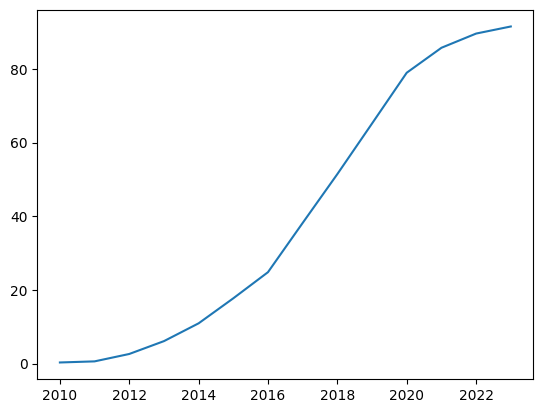

In [10]:
plt.plot(df['PEILDATUM'].unique(), df[df['PRODUCTSOORT'] == 'ELK'].groupby(['PEILDATUM'])['SLIMME_METER_PERC'].mean());

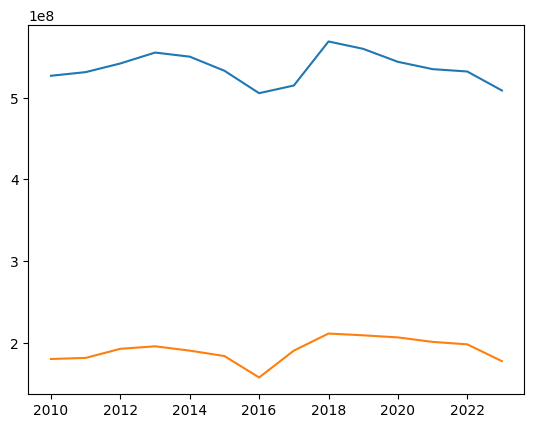

In [11]:

plt.plot(df['PEILDATUM'].unique(), df[df['PRODUCTSOORT'] == 'ELK'].groupby(['PEILDATUM'])['SJV_GEMIDDELD'].sum())
plt.plot(df['PEILDATUM'].unique(), df[df['PRODUCTSOORT'] == 'GAS'].groupby(['PEILDATUM'])['SJV_GEMIDDELD'].sum())

In [12]:
df[df['PRODUCTSOORT'] == 'ELK'].groupby(['PEILDATUM'])['SJV_GEMIDDELD'].sum()

PEILDATUM
2010-01-01    5.265813e+08
2011-01-01    5.310414e+08
2012-01-01    5.416147e+08
2013-01-01    5.549411e+08
2014-01-01    5.499293e+08
2015-01-01    5.327039e+08
2016-01-01    5.052923e+08
2017-01-01    5.146683e+08
2018-01-01    5.684906e+08
2019-01-01    5.594730e+08
2020-01-01    5.436398e+08
2021-01-01    5.346820e+08
2022-01-01    5.317946e+08
2023-01-01    5.085763e+08
Name: SJV_GEMIDDELD, dtype: float64

In [13]:
df[df['PRODUCTSOORT'] == 'ELK'].groupby(['PEILDATUM'])['AANSLUITINGEN_AANTAL'].sum()

PEILDATUM
2010-01-01    2311361
2011-01-01    2338819
2012-01-01    2395738
2013-01-01    2499429
2014-01-01    2511449
2015-01-01    2522314
2016-01-01    2454083
2017-01-01    2583882
2018-01-01    2636035
2019-01-01    2653261
2020-01-01    2666499
2021-01-01    2684511
2022-01-01    2698610
2023-01-01    2719406
Name: AANSLUITINGEN_AANTAL, dtype: uint64

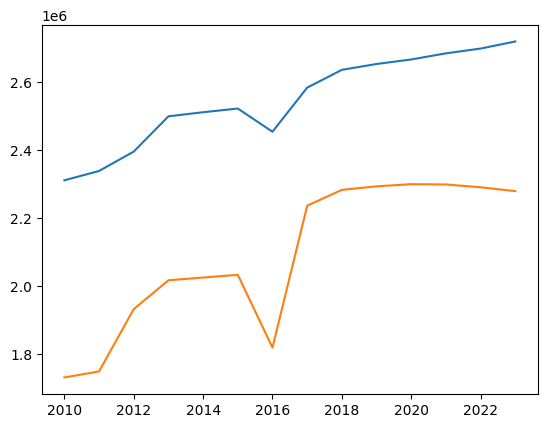

In [14]:
# It looks a lot like we are missing records in the 2016 data file

plt.plot(df['PEILDATUM'].unique(), df[df['PRODUCTSOORT'] == 'ELK'].groupby(['PEILDATUM'])['AANSLUITINGEN_AANTAL'].sum())
plt.plot(df['PEILDATUM'].unique(), df[df['PRODUCTSOORT'] == 'GAS'].groupby(['PEILDATUM'])['AANSLUITINGEN_AANTAL'].sum())

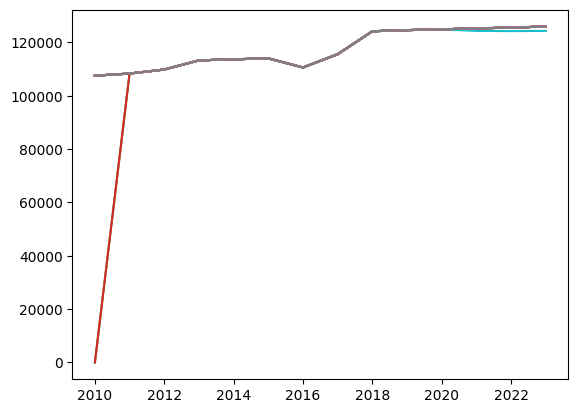

In [15]:
plt.plot(df['PEILDATUM'].unique(), df[df['PRODUCTSOORT'] == 'ELK'].groupby(['PEILDATUM']).count())

---
## File Encoding

In [16]:
import chardet

rawdata = open("../data/Enexis_kleinverbruiksgegevens_01012010.csv", "rb").read(1024 * 1024)
chardet.detect(rawdata) #['encoding']


{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}

In [17]:
for file in DECENTRALE_OPWEK:
    rawdata = open(file, "rb").read()
    print(f"{file} encoding: {chardet.detect(rawdata)}")


../data/Enexis_decentrale_opwek_kv_(zon_pv)_01012020.csv encoding: {'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}
../data/Enexis_decentrale_opwek_kv_(zon_pv)_01012021.csv encoding: {'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}
../data/Enexis_decentrale_opwek_kv_(zon_pv)_01012022.csv encoding: {'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}
../data/Enexis_decentrale_opwek_kv_(zon_pv)_01072020.csv encoding: {'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}
../data/Enexis_decentrale_opwek_kv_(zon_pv)_01072021.csv encoding: {'encoding': 'UTF-8-SIG', 'confidence': 1.0, 'language': ''}
../data/Enexis_decentrale_opwek_kv_(zon_pv)_01072022.csv encoding: {'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [ ]:
for file in KLEINVERBRUIKSGEGEVENS:
    rawdata = open(file, "rb").read()
    print(f"{file} encoding: {chardet.detect(rawdata)}")


../data/Enexis_kleinverbruiksgegevens_01012010.csv encoding: {'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [ ]:
for file in OPWEKDATA_GV:
    rawdata = open(file, "rb").read()
    print(f"{file} encoding: {chardet.detect(rawdata)}")
